In [1]:
import simexpal
import yaml
import matplotlib.pyplot as plt

import simexpal
import yaml

Algorithm chaining, fill factor 0.5 takes: 8810 ms (insert), 1596 ms (lookup)
Algorithm linear, fill factor 0.5 takes: 1428 ms (insert), 858 ms (lookup)
Algorithm quadratic probing, fill factor 0.5 takes: 1509 ms (insert), 923 ms (lookup)
Algorithm stl, fill factor 0.5 takes: 24465 ms (insert), 6079 ms (lookup)
Algorithm chaining, fill factor 0.8 takes: 15162 ms (insert), 2835 ms (lookup)
Algorithm linear, fill factor 0.8 takes: 2715 ms (insert), 1509 ms (lookup)
Algorithm quadratic probing, fill factor 0.8 takes: 2835 ms (insert), 1688 ms (lookup)
Algorithm stl, fill factor 0.8 takes: 42566 ms (insert), 9372 ms (lookup)
Algorithm chaining, fill factor 0.9 takes: 17464 ms (insert), 3255 ms (lookup)
Algorithm linear, fill factor 0.9 takes: 3353 ms (insert), 1781 ms (lookup)
Algorithm quadratic probing, fill factor 0.9 takes: 3440 ms (insert), 2023 ms (lookup)
Algorithm stl, fill factor 0.9 takes: 46702 ms (insert), 10850 ms (lookup)
Algorithm chaining, fill factor 0.95 takes: 18573 ms (

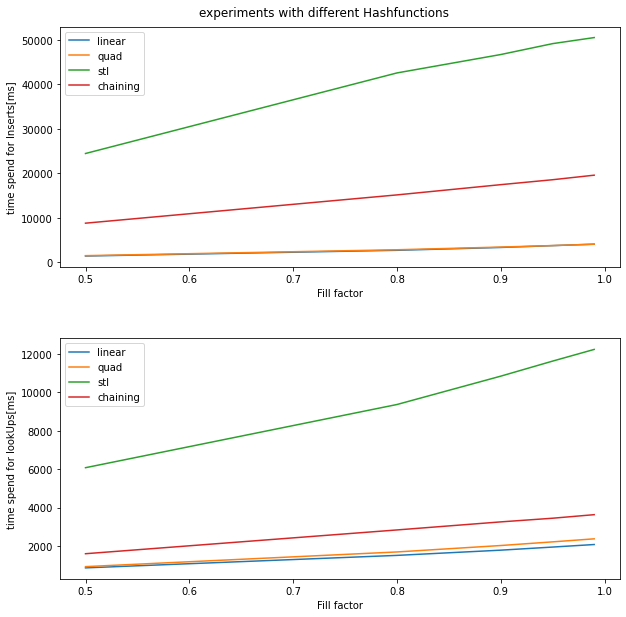

In [56]:
cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

fillFactors = []   

chainingInsert = []
chainingLookUp = []

linearInsert = []
linearLookUp = []

quadInsert = []
quadLookUp = []

stlInsert = []
stlLookUp = []

for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    if r['algo'] == 'chaining':
        fillFactors.append(r['fill_factor'])
        chainingInsert.append(r['time_insert'])
        chainingLookUp.append(r['time_lookup'])
        
    if r['algo'] == 'linear':
        linearInsert.append(r['time_insert'])
        linearLookUp.append(r['time_lookup'])
        
    if r['algo'] == 'quadratic probing':
        quadInsert.append(r['time_insert'])
        quadLookUp.append(r['time_lookup'])
        
    if r['algo'] == 'stl':
        stlInsert.append(r['time_insert'])
        stlLookUp.append(r['time_lookup'])
    
    print('Algorithm {}, fill factor {} takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['fill_factor'], r['time_insert'], r['time_lookup']))
    
fig, [ax1, ax2] = plt.subplots(2,1) 
fig.suptitle("experiments with different Hashfunctions")
fig.tight_layout()
fig.set_figwidth(9)
fig.set_figheight(9)
                 
ax1.plot(fillFactors, linearInsert, label="linear")
ax1.plot(fillFactors, quadInsert, label="quad")
ax1.plot(fillFactors, stlInsert, label="stl")
ax1.plot(fillFactors, chainingInsert, label="chaining")
ax1.set_xlabel("Fill factor")
ax1.set_ylabel("time spend for Inserts[ms]")
ax1.legend()

ax2.plot(fillFactors, linearLookUp, label="linear")
ax2.plot(fillFactors, quadLookUp, label="quad")
ax2.plot(fillFactors, stlLookUp, label="stl")
ax2.plot(fillFactors, chainingLookUp, label="chaining")
ax2.set_xlabel("Fill factor")
ax2.set_ylabel("time spend for lookUps[ms]")
ax2.legend()